https://www.kaggle.com/code/angshumandc/brain-stroke-data-analysis

# Brain Stroke EDA 

This project is intended to use a patient dataset to analyze the (common) characteristics possibly contributed to a brain stroke, provide visualizations, and also find possible correlations within each variable. 

# Planning

### Structure of this project will be organized as follows:

1. **Introduction:** Objective/background info on the project and dataset provided by user


2. **Understanding and Setup**: Import libraries and files, understand the data


3. **Cleaning:** Clean columns, find nulls, duplicates, inconsistent, missing values


4. **EDA** 
    
    a. Univariate Analysis - Overall distribution
    
    b. Correlation 
    
    c. Using visualizations to directly compare brain stroke patients and non brain stroke patients

# Introduction

Objective of this project is to **compare characteristics** between patients who had and did not have a brain stroke, and possibly **identify** whether some characteristics **influence the likelihood of a brain stroke**. However, it is worth noting that because brain strokes are often hereditary, this **does not gurantee** a direct correlation, but rather this project is intended to gain better insight with the given dataset regarding paritnes who had/did not have a brain stroke. 

Data is found via Kaggle by Jillani Soft Tech (https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset)

**Here are some details about the attributes given by the user who scrapped this data:**

1) gender: "Male", "Female" or "Other"

2) age: age of the patient

3) hypertension: 0: patient doesn't have hypertension, 1: patient has hypertension

4) heart disease: 0  patient doesn't have any heart diseases, 1: patient has a heart disease 

5) ever-married: "No" or "Yes"

6) worktype: "children", "Govt_job", "Neverworked", "Private" or "Self-employed" 

7) Residencetype: "Rural" or "Urban"

8) avgglucoselevel: average glucose level in blood

9) bmi: body mass index

10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

11) stroke: 1: patient had a stroke, 0: did not



_*Note: "Unknown" in smoking_status means that the information is unavailable for this patient_

# Understanding and Setup

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data

In [2]:
df = pd.read_csv('brain_stroke.csv')

### Understanding Dataset

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [6]:
df.shape

(4981, 11)

In [7]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [8]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [9]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [10]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

# Cleaning Data

In [11]:
#checking for nulls

df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**_there are no null values in this dataset. Yay!_**

In [12]:
# checking for duplicates
df[df.duplicated() == True]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


**_there are no duplicate values in this dataset. Yay!_**

In [13]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [14]:
df['age'].astype('int64').dtype

dtype('int64')

In [15]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# EDA: Univariate Analysis

For this project, I thought that it would be more insightful if we performed univatiate analysis on **two separate dataframes**: one tailored for patients who had a stroke (stroke == 1), and one for those who did not (stroke == 0). Lets do a side by side comparison for the distribution of each variable.

In [16]:
bs = df[df['stroke'] == 1]
no_bs = df[df['stroke'] == 0]

In [17]:
bs.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### Gender

C:\Users\leena\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\leena\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

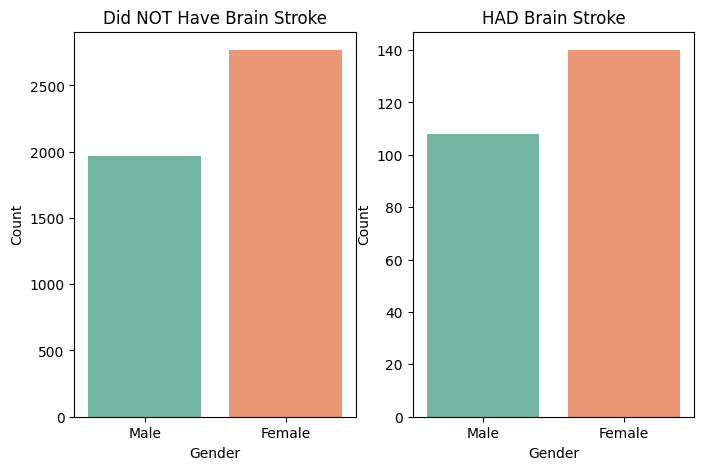

In [18]:
plt.figure(figsize = (8,5))

plt.subplot(1,2,1)
sns.countplot(no_bs['gender'], palette = 'Set2')
plt.title('Did NOT Have Brain Stroke')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(bs['gender'], palette = 'Set2')
plt.title('HAD Brain Stroke')
plt.xlabel('Gender')
plt.ylabel('Count')

It appears that the distribution betwen patients who had and did not have a brain stroke is almost exactly the same

In [19]:
no_bs_male = (no_bs['gender'].value_counts().loc['Male'] / no_bs.shape[0]) * 100
no_bs_female = (no_bs['gender'].value_counts().loc['Female'] / no_bs.shape[0]) * 100

print('Patients who did NOT Have Brain Stroke: \n% of Male: ' + str(no_bs_male.round(decimals = 2)))
print('% of Female: ' + str(no_bs_female.round(decimals = 2)))

Patients who did NOT Have Brain Stroke: 
% of Male: 41.54
% of Female: 58.46


In [20]:
bs_male = (bs['gender'].value_counts().loc['Male'] / bs.shape[0]) * 100
bs_female = (bs['gender'].value_counts().loc['Female'] / bs.shape[0]) * 100

print('Patients who DID Have Brain Stroke: \n% of Male: ' + str(bs_male.round(decimals=2)))
print('% of Female: ' + str(bs_female.round(decimals=2)))

Patients who DID Have Brain Stroke: 
% of Male: 43.55
% of Female: 56.45


### Age

Text(0, 0.5, 'Count')

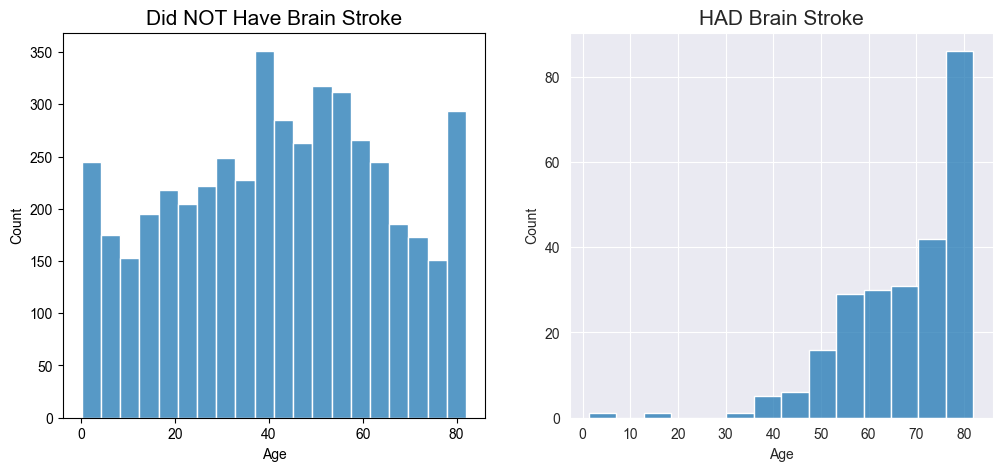

In [21]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.set_style('darkgrid')
sns.histplot(no_bs.age)
plt.title('Did NOT Have Brain Stroke', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.set_style('darkgrid')
sns.histplot(bs.age)
plt.title('HAD Brain Stroke', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Count')


Did **NOT** Have Brain Stroke: 
- pretty symmetrical 
- most are usually 40 year old patients
- Nevertheless, suggests that having brain stroke is typically not common for most age groups

**Had** Brain Stroke: 
- left skewed 
- most are 80+ year old patients 
- Suggests that people are more likely to have a brain stroke as they get older


### Hypertension

C:\Users\leena\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\leena\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

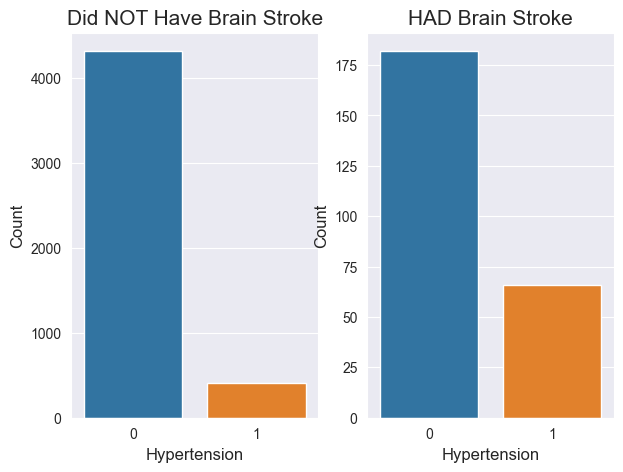

In [39]:
plt.figure(figsize=(7,5))

plt.subplot(1,2,1)
sns.countplot(no_bs.hypertension)
plt.title('Did NOT Have Brain Stroke', fontsize = 15)
plt.xlabel('Hypertension', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

plt.subplot(1,2,2)
sns.countplot(bs.hypertension)
plt.title('HAD Brain Stroke', fontsize= 15)
plt.xlabel('Hypertension', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

Both bar charts show that most patients did **not** have hypertension, a larger **proportion** of patients **had hypertension** amongst those who **had a brain stroke**. However, this may be simply due to the smaller number of patients who had a brain stroke in total. 

That being said, let's calculate the % of patients who had hypertension

In [23]:
no_bs_hyp = (no_bs['hypertension'].value_counts().loc[1] / no_bs.shape[0])*100
bs_hyp = (bs['hypertension'].value_counts().loc[1] / bs.shape[0])*100

In [24]:
print('% With Hypertension AND WITHOUT Brain Stroke: ' + str(no_bs_hyp.round(decimals=2)))
print('& With Hypertension AND Brain Stroke: ' + str(bs_hyp.round(decimals=2)))

% With Hypertension AND WITHOUT Brain Stroke: 8.73
& With Hypertension AND Brain Stroke: 26.61


It appears that a significantly larger % of patients who **had a brain stroke also had hypertension** (27% as opposed to 9%)

### Heart Disease

In [26]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


C:\Users\leena\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\leena\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'HAD Brain Stroke')

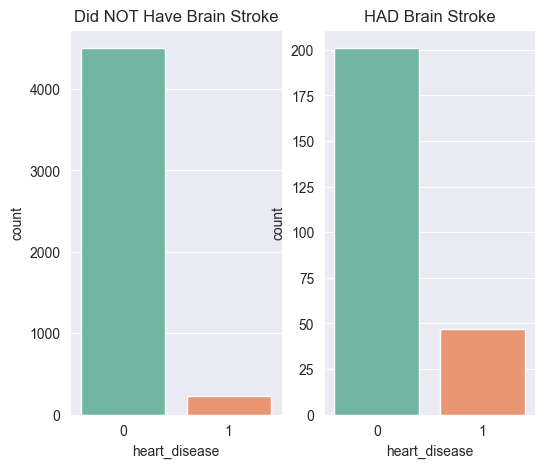

In [40]:
plt.figure(figsize=(6,5))

plt.subplot(1,2,1)
sns.countplot(no_bs.heart_disease, palette = 'Set2')
plt.title('Did NOT Have Brain Stroke')

plt.subplot(1,2,2)
sns.countplot(bs.heart_disease, palette = 'Set2')
plt.title('HAD Brain Stroke')

This distribution for heart disease is very similar to the distribution of hypertensions. Just like the prior, here below are the proportion of patients who had/did not have heart disease. It would be better to measure proportion since there there is a significanly larger pool of patients who did not have a brain stroke. 

In [50]:
no_bs_heart = (no_bs['heart_disease'].value_counts().loc[1]/no_bs.shape[0])*100
bs_heart = (bs['heart_disease'].value_counts().loc[1]/bs.shape[0])*100

print('% of Non Brain Stroke Patients with Heart Disease: ' + str(no_bs_heart.round(decimals=2)))
print('% of Brain Stroke Patients with Heart Disease: ' + str(bs_heart.round(decimals=2)))

% of Non Brain Stroke Patients with Heart Disease: 4.82
% of Brain Stroke Patients with Heart Disease: 18.95


Though this is noticeable proportion difference between patients who had a heart disease, we can **not gurantee** that there is some positive correlation between heart disease and patients who had a brain stroke. This is mainly because of the **sample size differences**: there were about 5000 patients who did not have a brain stroke while only around 250 patients did have a brain stroke. This would be stronger if the sample size for patients who had a brain stroke was larger.

### Married

### Work Type

### Residence Type

### Average Glucose Level

### BMI

### Smoking Status